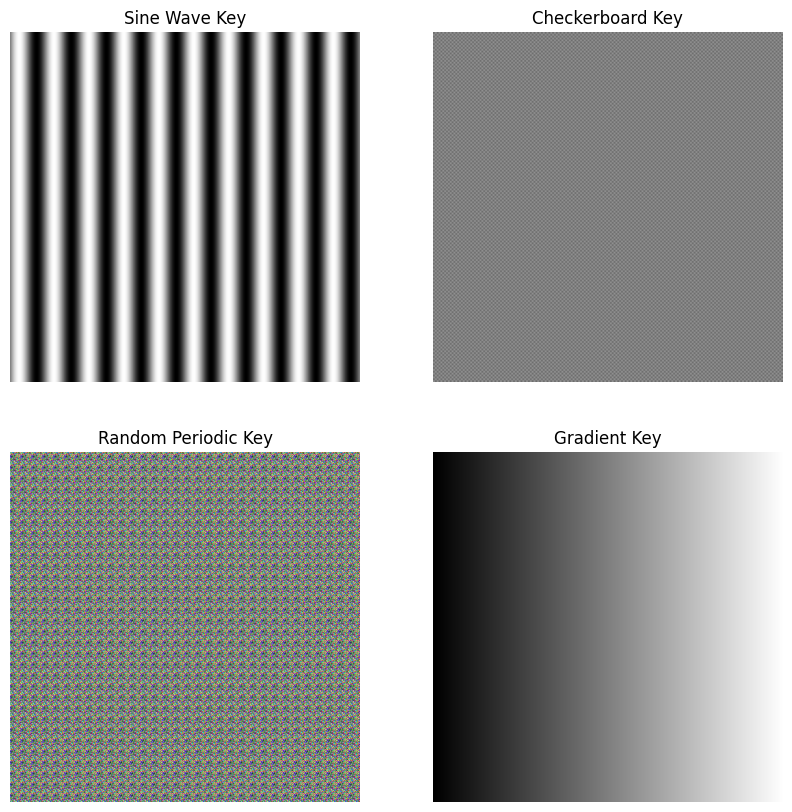

Key generation complete! Each key file contains 786,432 values in a single column.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Image dimensions
WIDTH = 512
HEIGHT = 512
CHANNELS = 3  # RGB
TOTAL_KEYS = WIDTH * HEIGHT * CHANNELS  # 786,432

# Function to save all keys in a single-column format
def save_key_to_file(filename, key):
    key_flattened = key.flatten()  # Flatten into a single-column format
    np.savetxt(filename, key_flattened, fmt="%d")  # Save as integers (0-255)

# Function to generate a sine wave key
def generate_sine_key():
    x = np.linspace(0, 2 * np.pi, WIDTH)
    sine_wave = ((np.sin(x * 10) + 1) / 2 * 255).astype(np.uint8)  # Normalize to 0-255
    key = np.tile(sine_wave, (HEIGHT, 1))  # Repeat pattern along height
    return np.repeat(key[:, :, np.newaxis], CHANNELS, axis=2)  # Expand for RGB

# Function to generate a checkerboard key
def generate_checkerboard_key():
    key = np.indices((HEIGHT, WIDTH)).sum(axis=0) % 2 * 255  # Alternating 0 and 255
    return np.repeat(key[:, :, np.newaxis], CHANNELS, axis=2)  # Expand for RGB

# Function to generate a random periodic key
def generate_random_periodic_key():
    np.random.seed(42)  # Fixed seed for repeatability
    base_pattern = np.random.randint(0, 256, (16, 16, CHANNELS), dtype=np.uint8)  # Small repeating block
    key = np.tile(base_pattern, (HEIGHT // 16, WIDTH // 16, 1))  # Tile pattern
    return key

# Function to generate a linear gradient key
def generate_gradient_key():
    gradient = np.linspace(0, 255, WIDTH, dtype=np.uint8)  # Smooth gradient
    key = np.tile(gradient, (HEIGHT, 1))  # Repeat along height
    return np.repeat(key[:, :, np.newaxis], CHANNELS, axis=2)  # Expand for RGB

# Generate all keys
sine_key = generate_sine_key()
checkerboard_key = generate_checkerboard_key()
random_key = generate_random_periodic_key()
gradient_key = generate_gradient_key()

# Save keys in a single-column format (ALL IN ONE FILE)
save_key_to_file("sine_key_all.txt", sine_key)
save_key_to_file("checkerboard_key_all.txt", checkerboard_key)
save_key_to_file("random_key_all.txt", random_key)
save_key_to_file("gradient_key_all.txt", gradient_key)

# Display generated keys as images
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(sine_key)
axes[0, 0].set_title("Sine Wave Key")
axes[0, 1].imshow(checkerboard_key)
axes[0, 1].set_title("Checkerboard Key")
axes[1, 0].imshow(random_key)
axes[1, 0].set_title("Random Periodic Key")
axes[1, 1].imshow(gradient_key)
axes[1, 1].set_title("Gradient Key")

for ax in axes.ravel():
    ax.axis("off")

plt.show()

print("Key generation complete! Each key file contains 786,432 values in a single column.")
